<a href="https://colab.research.google.com/github/Pragna235/Traffic-Prediction-with-MLP/blob/main/Traffic_Prediction_with_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Prediction with Multilayer Perceptron

Regression Model

### Problem Statement
The task is to predict traffic volume using historical traffic data. The data is likely structured with time-series information, and the goal is to build a model that can forecast future traffic volumes based on past observations.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf # An open-source deep learning framework developed by Google
import keras # A high-level neural networks API, written in Python and capable of running on top of TensorFlow. It allows for easy and fast prototyping.
import math
from keras.models import Sequential
from keras.layers import Dense
#%matplotlib inline

# Importing Dataset & Visualize

In [15]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/train27303.csv")
df.head()

,timestamp,hourly_traffic_count
0,2015-10-04 00:00:00,3
1,2015-10-04 00:05:00,16
2,2015-10-04 00:10:00,9
3,2015-10-04 00:15:00,12
4,2015-10-04 00:20:00,19


In [8]:
df1 = df.reset_index()['hourly_traffic_count']
df1.head()

0     3
1    16
2     9
3    12
4    19
Name: hourly_traffic_count, dtype: int64

In [9]:
df1 = df1.iloc[:9792,]
df1.tail()

9787    23
9788    25
9789    16
9790    18
9791    25
Name: hourly_traffic_count, dtype: int64

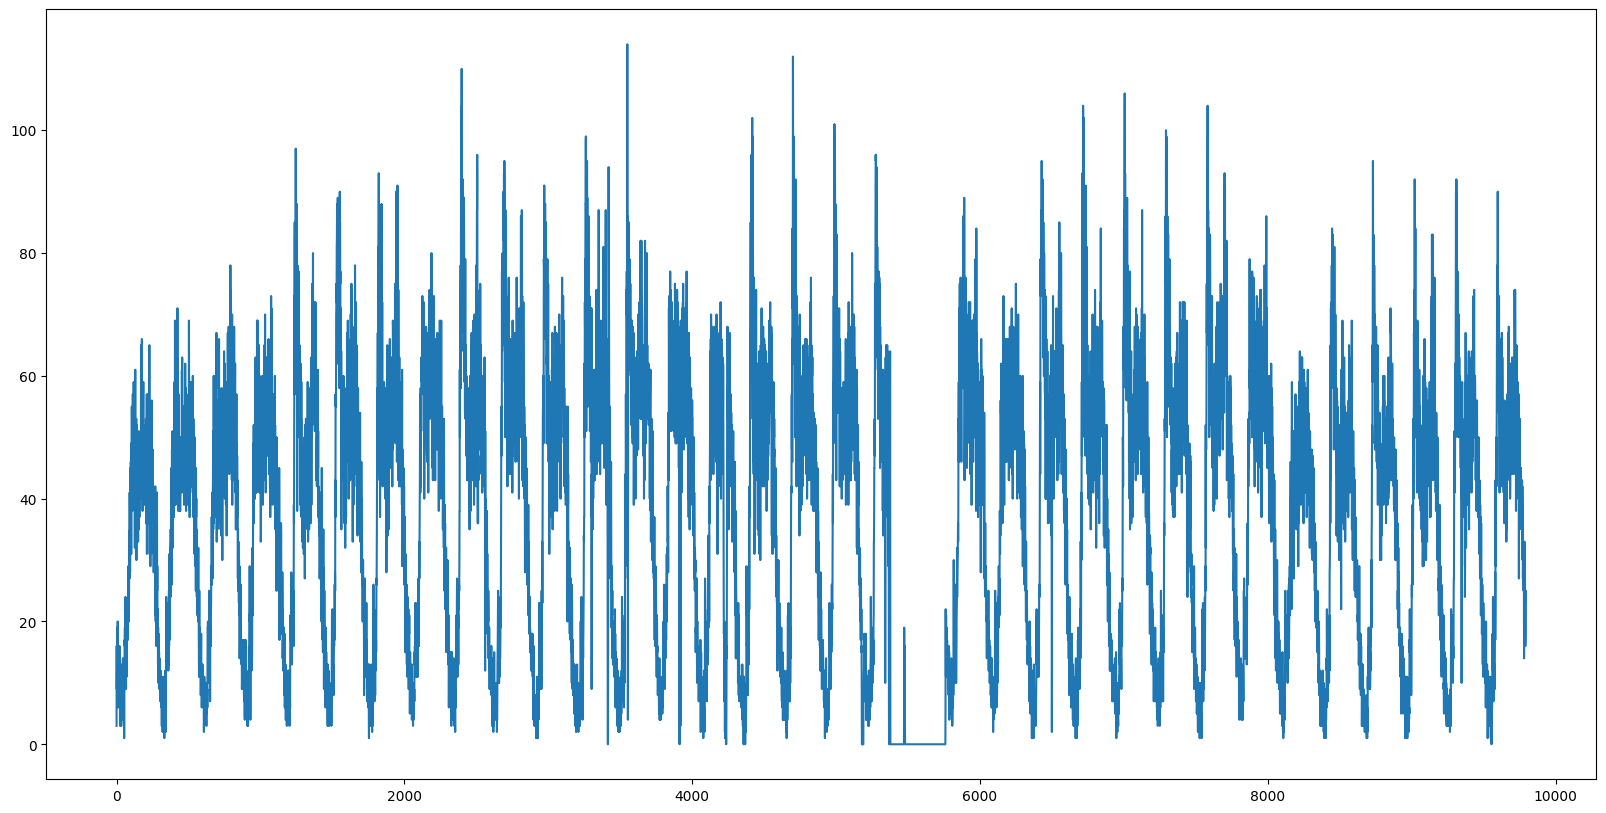

In [12]:
plt.figure(figsize = (20,10))
plt.plot(df1)
plt.show()

# Reshaping dataset with Window = 1

In [17]:
def create_dataset(dataset,window=1): #sliding window method
    dataX, dataY = [],[] #input, output
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

# Feature Scaling for easier computation

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

# Train Test Split (80% train, 20% test)

In [19]:
training_size = int(len(df1)*0.80)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1),:1]

In [20]:
window = 288
X_train,y_train = create_dataset(train_data,window)
X_test,y_test = create_dataset(test_data,window)

# Multilayer Perceptron Model

In [22]:
model = Sequential()
model.add(Dense(40,input_dim=window,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1))

In [23]:
opt = keras.optimizers.Adagrad(learning_rate = 0.05)

In [24]:
model.compile(optimizer = opt, loss='mean_squared_error')

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 40)                11560     
                                                                 
 dense_2 (Dense)             (None, 50)                2050      
                                                                 
 dense_3 (Dense)             (None, 40)                2040      
                                                                 
 dense_4 (Dense)             (None, 1)                 41        
                                                                 
Total params: 15691 (61.29 KB)
Trainable params: 15691 (61.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,epochs=30, batch_size=10,verbose=1) #verbose value : (0,1,2)

Epoch 1/30
755/755 [==============================] - 2s 2ms/step - loss: 0.0093
Epoch 2/30
755/755 [==============================] - 2s 3ms/step - loss: 0.0061
Epoch 3/30
755/755 [==============================] - 2s 3ms/step - loss: 0.0057
Epoch 4/30
755/755 [==============================] - 2s 3ms/step - loss: 0.0055
Epoch 5/30
755/755 [==============================] - 1s 2ms/step - loss: 0.0053
Epoch 6/30
755/755 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 7/30
755/755 [==============================] - 1s 2ms/step - loss: 0.0051
Epoch 8/30
755/755 [==============================] - 1s 2ms/step - loss: 0.0050
Epoch 9/30
755/755 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 10/30
755/755 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 11/30
755/755 [==============================] - 1s 2ms/step - loss: 0.0048
Epoch 12/30
755/755 [==============================] - 2s 3ms/step - loss: 0.0048
Epoch 13/30
755/755 [====

# Predicting the Future Traffic Count

In [27]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

53/53 [==============================] - 0s 2ms/step


In [28]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

In [29]:
train_predict = train_predict.astype(int)
test_predict = test_predict.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Accuracy Measures

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('RMSE-train:',math.sqrt(mean_squared_error(y_train,train_predict)))
print('MAE-train:',mean_absolute_error(y_train,train_predict))
print('R_2-train:',r2_score(y_train,train_predict))

RMSE-train: 7.271638276465214
MAE-train: 5.237539766702015
R_2-train: 0.9068801875792475


In [31]:
print('RMSE-test:',math.sqrt(mean_squared_error(y_test,test_predict)))
print('MAE-test:',mean_absolute_error(y_test,test_predict))
print('R_2-train:',r2_score(y_test,test_predict))

RMSE-test: 7.145787251877976
MAE-test: 5.3988023952095805
R_2-train: 0.8729796721672092


# Visualization

Blue line is the actual dataset, orange is the training and green is the test results


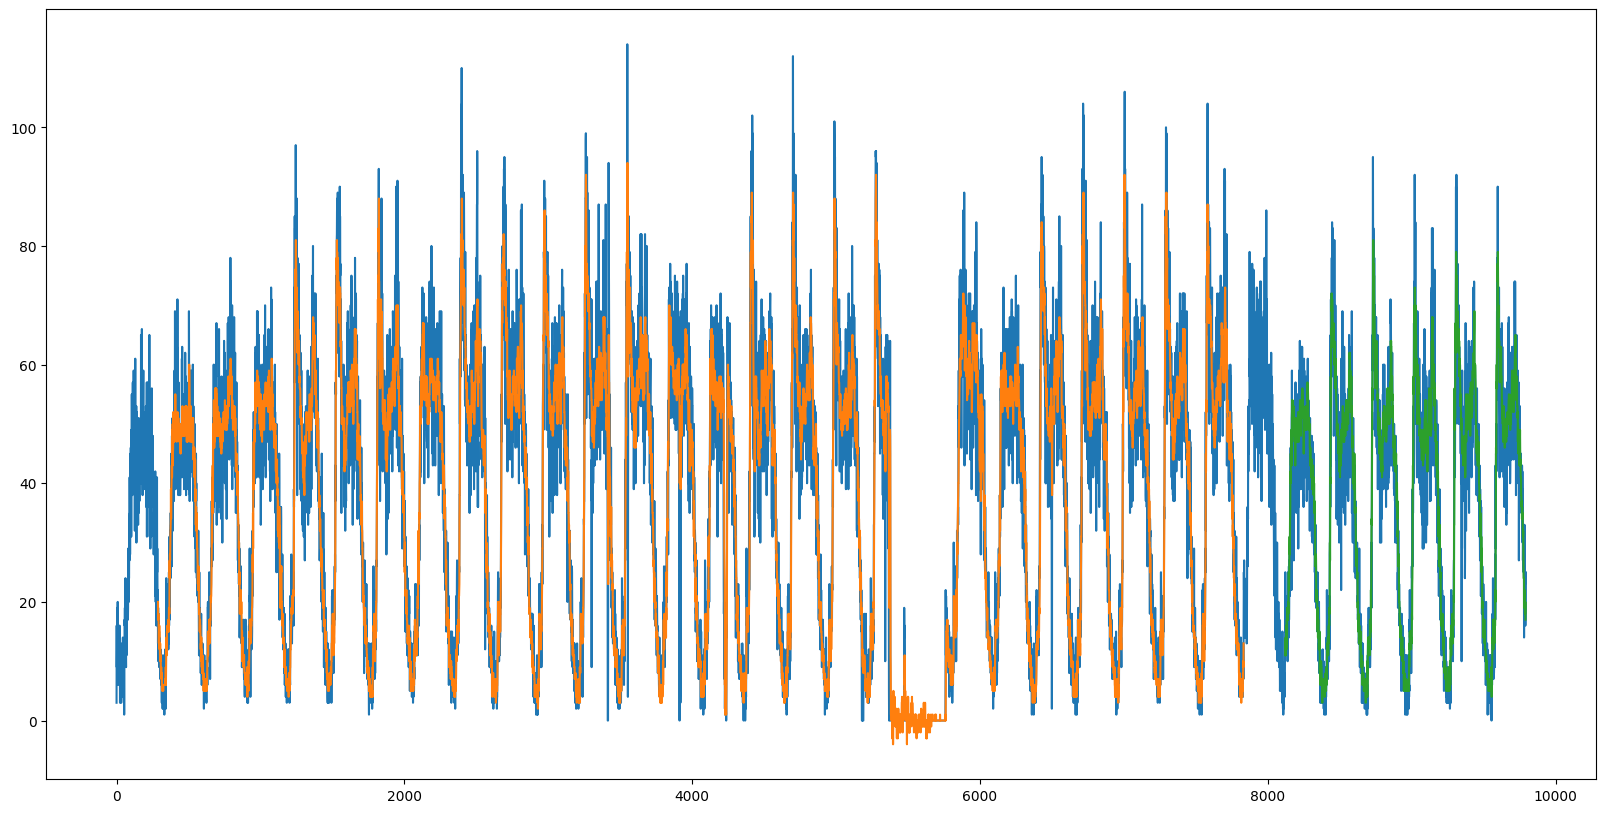

In [32]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window:len(train_predict)+window, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(window*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()